In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Generation using Modelling and Simulation for Machine Learning

## Epidemic Spread Simulation using SIR Model

This project generates synthetic epidemic data using the SIR model and applies multiple ML models to predict peak infection.

In [10]:
def sir_simulation(beta, gamma, I0, N, days):
    S = N - I0
    I = I0
    R = 0
    
    peak_infected = I
    
    for _ in range(days):
        new_infected = beta * S * I / N
        new_recovered = gamma * I
        
        S -= new_infected
        I += new_infected - new_recovered
        R += new_recovered
        
        peak_infected = max(peak_infected, I)
    
    return peak_infected

## Parameter Bounds

- Beta: 0.1 – 1.0  
- Gamma: 0.05 – 0.5  
- Initial Infected: 1 – 50  
- Population: 500 – 2000  
- Simulation Days: 50 – 200  

In [11]:
data = []

for _ in range(1000):
    beta = np.random.uniform(0.1, 1.0)
    gamma = np.random.uniform(0.05, 0.5)
    I0 = np.random.randint(1, 50)
    N = np.random.randint(500, 2000)
    days = np.random.randint(50, 200)
    
    peak_I = sir_simulation(beta, gamma, I0, N, days)
    
    data.append([beta, gamma, I0, N, days, peak_I])

df = pd.DataFrame(data, columns=[
    "Beta", "Gamma", "Initial_Infected", 
    "Population", "Days", "Peak_Infected"
])

df.head()

,Beta,Gamma,Initial_Infected,Population,Days,Peak_Infected
0,0.156144,0.275578,22,1014,130,22.000000
1,0.215487,0.448798,14,1305,151,14.000000
2,0.589583,0.213363,6,816,143,240.647443
3,0.270850,0.321732,42,1696,69,42.000000
4,0.887977,0.246530,37,1538,187,638.908151


In [12]:
df.to_csv("generated_dataset.csv", index=False)

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop("Peak_Infected", axis=1)
y = df["Peak_Infected"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor()
}

results = []

for name, model in models.items():
    
    if name in ["SVR", "KNN", "Linear Regression", "Ridge Regression"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    results.append([name, r2, mse])

results_df = pd.DataFrame(results, columns=["Model", "R2 Score", "MSE"])
results_df.sort_values(by="R2 Score", ascending=False)

,Model,R2 Score,MSE
4,Gradient Boosting,0.983171,1574.126192
3,Random Forest,0.982498,1637.057069
2,Decision Tree,0.946586,4996.121895
6,KNN,0.937322,5862.606989
0,Linear Regression,0.822071,16642.709322
1,Ridge Regression,0.822051,16644.578629
5,SVR,0.119520,82356.276079


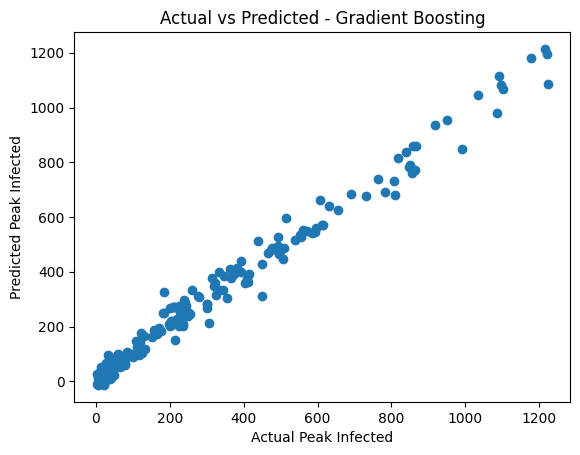

In [16]:
best_model = GradientBoostingRegressor()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Peak Infected")
plt.ylabel("Predicted Peak Infected")
plt.title("Actual vs Predicted - Gradient Boosting")
plt.show()

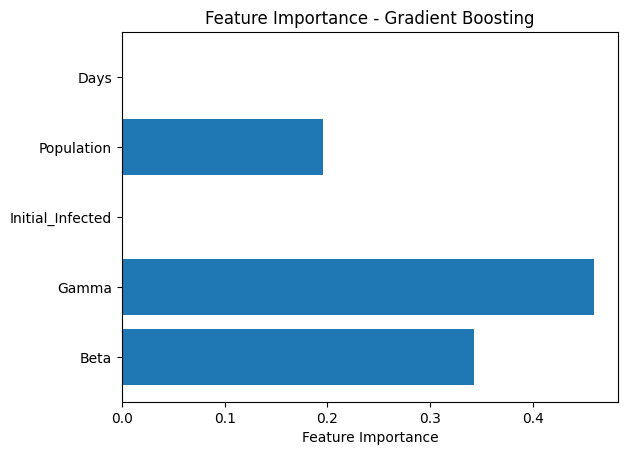

In [17]:
importances = best_model.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance - Gradient Boosting")
plt.show()

## Feature Importance Analysis

The Gradient Boosting model indicates that Gamma (recovery rate) and Beta (infection rate) are the most influential parameters affecting peak infection levels.

This aligns with epidemiological theory, as epidemic growth is primarily governed by transmission and recovery dynamics.

Population size has moderate impact, while initial infected count and simulation duration have relatively lower influence within the chosen parameter range.